# Improving the chapter 5 classifier.
> Taking the fastbook chapter 5 challenge.

- toc: true
- badges: true
- comments: true
- categories: [jupyter, exercise]
- image: images/chart-preview.png

In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
import pandas as pd
import numpy as np

In [5]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [6]:
Path.BASE_PATH = path

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images", num_workers=0)

In [8]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0030199517495930195)

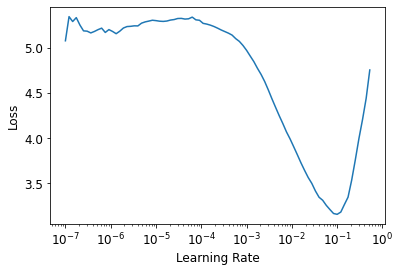

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(6, freeze_epochs=3, base_lr=3e-3)

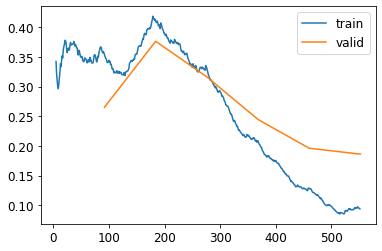

In [15]:
learn.recorder.plot_loss()

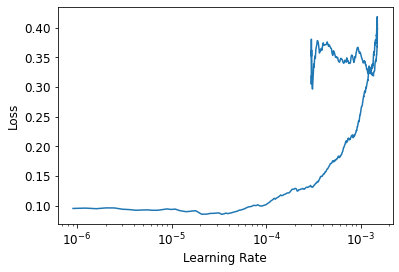

In [16]:
learn.recorder.plot_lr_find()

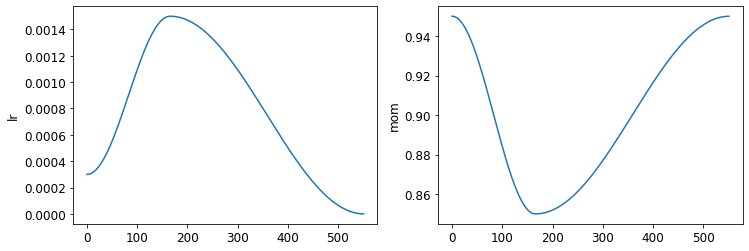

In [17]:
learn.recorder.plot_sched()
